# Création du dataset

In [3]:
import missingno as msno                                                        
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "darkgrid")
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import scipy.stats as st
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [4]:
def get_df_name(df):                                                               # Fonction permettant de retourner le nom d'un dataframe
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [5]:
def dataset_quality(data) :                                                        # Fonction permettant de retourner un dataframe contenant, 
  a = []                                                                           # pour chaque colonne du dataset en entrée,
  b = []                                                                           # son nom, le pourcentage de données présentes, 
  c = []                                                                           # le nombre de valeurs uniques et le type
  d = []                                     

  for columns in data.columns : 
    a.append(columns)
    b.append(data[columns].notna().mean() *100)
    c.append(len(data[columns].unique()))
    d.append(data[columns].dtype)

  data_quality = DataFrame(data = a, columns = ["Nom colonne"]) 
  data_quality["% remplie"] = b   
  data_quality["Nombre de valeurs uniques"] = c 
  data_quality["Type de la colonne"] = d  

  return data_quality                        

In [6]:
customers = pd.read_csv("/content/drive/MyDrive/Projet 5/olist_customers_dataset.csv", sep = ",")
geolocation = pd.read_csv("/content/drive/MyDrive/Projet 5/olist_geolocation_dataset.csv", sep = ",")
order_items = pd.read_csv("/content/drive/MyDrive/Projet 5/olist_order_items_dataset.csv", sep = ",")
order_payments = pd.read_csv("/content/drive/MyDrive/Projet 5/olist_order_payments_dataset.csv", sep = ",")
order_reviews = pd.read_csv("/content/drive/MyDrive/Projet 5/olist_order_reviews_dataset.csv", sep = ",")
orders = pd.read_csv("/content/drive/MyDrive/Projet 5/olist_orders_dataset.csv", sep = ",")
products = pd.read_csv("/content/drive/MyDrive/Projet 5/olist_products_dataset.csv", sep = ",")
sellers = pd.read_csv("/content/drive/MyDrive/Projet 5/olist_sellers_dataset.csv", sep = ",")
product_category = pd.read_csv("/content/drive/MyDrive/Projet 5/product_category_name_translation.csv", sep = ",")

In [7]:
datalist = [customers, geolocation, order_items, order_payments, order_reviews, orders, products, sellers, product_category]

for dataset in datalist :
  print("Le dataset", get_df_name(dataset), "est composé de", dataset.shape[0], "lignes et de", dataset.shape[1], "colonnes.")
  print(list(dataset.columns))
  display(dataset_quality(dataset))
  print(" ")
  print("_____________________________")
  print(" ")

Le dataset customers est composé de 99441 lignes et de 5 colonnes.
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


,Nom colonne,% remplie,Nombre de valeurs uniques,Type de la colonne
0,customer_id,100.0,99441,object
1,customer_unique_id,100.0,96096,object
2,customer_zip_code_prefix,100.0,14994,int64
3,customer_city,100.0,4119,object
4,customer_state,100.0,27,object


 
_____________________________
 
Le dataset geolocation est composé de 1000163 lignes et de 5 colonnes.
['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']


,Nom colonne,% remplie,Nombre de valeurs uniques,Type de la colonne
0,geolocation_zip_code_prefix,100.0,19015,int64
1,geolocation_lat,100.0,717360,float64
2,geolocation_lng,100.0,717613,float64
3,geolocation_city,100.0,8011,object
4,geolocation_state,100.0,27,object


 
_____________________________
 
Le dataset order_items est composé de 112650 lignes et de 7 colonnes.
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']


,Nom colonne,% remplie,Nombre de valeurs uniques,Type de la colonne
0,order_id,100.0,98666,object
1,order_item_id,100.0,21,int64
2,product_id,100.0,32951,object
3,seller_id,100.0,3095,object
4,shipping_limit_date,100.0,93318,object
5,price,100.0,5968,float64
6,freight_value,100.0,6999,float64


 
_____________________________
 
Le dataset order_payments est composé de 103886 lignes et de 5 colonnes.
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']


,Nom colonne,% remplie,Nombre de valeurs uniques,Type de la colonne
0,order_id,100.0,99440,object
1,payment_sequential,100.0,29,int64
2,payment_type,100.0,5,object
3,payment_installments,100.0,24,int64
4,payment_value,100.0,29077,float64


 
_____________________________
 
Le dataset order_reviews est composé de 99224 lignes et de 7 colonnes.
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


,Nom colonne,% remplie,Nombre de valeurs uniques,Type de la colonne
0,review_id,100.000000,98410,object
1,order_id,100.000000,98673,object
2,review_score,100.000000,5,int64
3,review_comment_title,11.658470,4528,object
4,review_comment_message,41.297468,36160,object
5,review_creation_date,100.000000,636,object
6,review_answer_timestamp,100.000000,98248,object


 
_____________________________
 
Le dataset orders est composé de 99441 lignes et de 8 colonnes.
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


,Nom colonne,% remplie,Nombre de valeurs uniques,Type de la colonne
0,order_id,100.000000,99441,object
1,customer_id,100.000000,99441,object
2,order_status,100.000000,8,object
3,order_purchase_timestamp,100.000000,98875,object
4,order_approved_at,99.839101,90734,object
5,order_delivered_carrier_date,98.206977,81019,object
6,order_delivered_customer_date,97.018332,95665,object
7,order_estimated_delivery_date,100.000000,459,object


 
_____________________________
 
Le dataset products est composé de 32951 lignes et de 9 colonnes.
['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


,Nom colonne,% remplie,Nombre de valeurs uniques,Type de la colonne
0,product_id,100.000000,32951,object
1,product_category_name,98.148766,74,object
2,product_name_lenght,98.148766,67,float64
3,product_description_lenght,98.148766,2961,float64
4,product_photos_qty,98.148766,20,float64
5,product_weight_g,99.993930,2205,float64
6,product_length_cm,99.993930,100,float64
7,product_height_cm,99.993930,103,float64
8,product_width_cm,99.993930,96,float64


 
_____________________________
 
Le dataset sellers est composé de 3095 lignes et de 4 colonnes.
['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']


,Nom colonne,% remplie,Nombre de valeurs uniques,Type de la colonne
0,seller_id,100.0,3095,object
1,seller_zip_code_prefix,100.0,2246,int64
2,seller_city,100.0,611,object
3,seller_state,100.0,23,object


 
_____________________________
 
Le dataset product_category est composé de 71 lignes et de 2 colonnes.
['product_category_name', 'product_category_name_english']


,Nom colonne,% remplie,Nombre de valeurs uniques,Type de la colonne
0,product_category_name,100.0,71,object
1,product_category_name_english,100.0,71,object


 
_____________________________
 


In [8]:
customers_orders = pd.merge(customers, orders, on ='customer_id', how = 'inner')                # Fusion des dataframe customers et orders avec le pivot "customer_id"
customers_orders = pd.merge(customers_orders, order_payments, on ='order_id', how = 'inner')    # Fusion du dataframe précédent et order_payments avec le pivot "order_id"
customers_orders = pd.merge(customers_orders, order_reviews, on ='order_id', how = 'inner')

In [9]:
customers_orders["order_purchase_timestamp"] = pd.to_datetime(customers_orders["order_purchase_timestamp"], errors='coerce')   # Passage des colonnes dates en format Datetime
customers_orders["order_approved_at"] = pd.to_datetime(customers_orders["order_approved_at"], errors='coerce')
customers_orders["order_delivered_carrier_date"] = pd.to_datetime(customers_orders["order_delivered_carrier_date"], errors='coerce')
customers_orders["order_delivered_customer_date"] = pd.to_datetime(customers_orders["order_delivered_customer_date"], errors='coerce')
customers_orders["order_estimated_delivery_date"] = pd.to_datetime(customers_orders["order_estimated_delivery_date"], errors='coerce')

In [10]:
customers_orders["order_late_days"] = (customers_orders["order_delivered_customer_date"] - customers_orders["order_estimated_delivery_date"]).dt.days
customers_orders["order_delivery_days"] = (customers_orders["order_delivered_customer_date"] - customers_orders["order_approved_at"]).dt.days
customers_orders["left_a_review"] = customers_orders["review_comment_message"].notna()

In [11]:
dataset_quality(customers_orders)

,Nom colonne,% remplie,Nombre de valeurs uniques,Type de la colonne
0,customer_id,100.000000,98672,object
1,customer_unique_id,100.000000,95379,object
2,customer_zip_code_prefix,100.000000,14973,int64
3,customer_city,100.000000,4117,object
4,customer_state,100.000000,27,object
5,order_id,100.000000,98672,object
6,order_status,100.000000,8,object
7,order_purchase_timestamp,100.000000,98114,datetime64[ns]
8,order_approved_at,99.835065,90082,datetime64[ns]
9,order_delivered_carrier_date,98.205002,80451,datetime64[ns]


In [12]:
customers_orders.head(100)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_late_days,order_delivery_days,left_a_review
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,-11.0,8.0,False
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,-8.0,16.0,False
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,25.0,False
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,-13.0,14.0,False
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,-6.0,11.0,True
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,1,debit_card,1,282.21,9a6614162d285301aa3ef6de4be75265,5,NaN,Loja responsável,2017-09-29 00:00:00,2017-10-01 21:52:53,-6.0,13.0,True
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05,1,credit_card,1,22.77,bc88d3b86fa8443d42894eb7b5f0d73c,5,NaN,NaN,2018-02-21 00:00:00,2018-02-26 13:53:18,-13.0,1.0,False
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08,1,credit_card,3,36.01,2381e1fb0932d9459573a0553dd8a2b5,3,NaN,NaN,2017-11-28 00:00:00,2017-11-28 17:14:46,-11.0,10.0,False
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,2018-01-26 15:17:57,2018-02-20,1,debit_card,1,39.10,8566d94f7bf3bedbb4ca6a29725fc382,5,NaN,chegou antes do prometido,2018-01-27 00:00:00,2018-01-30 19:18:27,-25.0,8.0,True
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,2018-01-13 14:51:55,2018-02-05,1,credit_card,1,122.47,07f4bedc3ab711f4b3400ceaecdd9f9b,5,NaN,"ótimo, entregou antes da data prevista.",2018-01-14 00:00:00,20

In [13]:
# Nombre de commandes
data = customers["customer_unique_id"].value_counts().rename_axis('ID Client').reset_index(name='Nombre de commandes')

# Ville
subset = customers_orders.groupby(["customer_unique_id"]).customer_city.max().rename_axis('ID Client').reset_index(name='Ville')
data = pd.merge(data, subset, on ='ID Client', how = 'inner') 

# Date de la dernière commande
subset = customers_orders.groupby(["customer_unique_id"]).order_purchase_timestamp.max().rename_axis('ID Client').reset_index(name='Date de la dernière commande')
data = pd.merge(data, subset, on ='ID Client', how = 'inner')    

# Année de la dernière commande
data["Année de la dernière commande"] = data["Date de la dernière commande"].dt.year

# Mois de la dernière commande
subset = customers_orders.groupby(["customer_unique_id"]).order_purchase_timestamp.max().dt.month.rename_axis('ID Client').reset_index(name='Mois de la dernière commande')
data = pd.merge(data, subset, on ='ID Client', how = 'inner')

# Jours depuis la dernière commande
max_date = customers_orders["order_purchase_timestamp"].max()                                           
data["Jours depuis la dernière commande"] = (max_date - data["Date de la dernière commande"]).dt.days     


# Somme des paiements
subset = customers_orders.groupby(["customer_unique_id"]).payment_value.sum().rename_axis('ID Client').reset_index(name='Somme des paiements')
data = pd.merge(data, subset, on ='ID Client', how = 'inner')                    

# Moyenne des paiements
subset = customers_orders.groupby(["customer_unique_id"]).payment_value.mean().rename_axis('ID Client').reset_index(name='Moyenne des paiements')
data = pd.merge(data, subset, on ='ID Client', how = 'inner')                      

# Moyenne du nombre de paiements
subset = customers_orders.groupby(["customer_unique_id"]).payment_installments.mean().rename_axis('ID Client').reset_index(name='Moyenne du nombre de paiements')
data = pd.merge(data, subset, on ='ID Client', how = 'inner') 

# Payé en plusieurs fois ?
data["Paye en plusieurs fois ?"] = data["Moyenne du nombre de paiements"] > 1

# A fait plus d'une commande
data["A fait au moins 2 commandes ?"] = data["Nombre de commandes"] > 1

# A mis un commentaire
subset = customers_orders.groupby(["customer_unique_id"]).left_a_review.mean().rename_axis('ID Client').reset_index(name='A mis un commentaire ?')
data = pd.merge(data, subset, on ='ID Client', how = 'inner')
data["A mis un commentaire ?"] = data["A mis un commentaire ?"] > 0

# Dernière note
subset = customers_orders.groupby(["customer_unique_id"]).review_score.first().rename_axis('ID Client').reset_index(name='Dernière note donnée')
data = pd.merge(data, subset, on ='ID Client', how = 'inner')

# Moyenne des notes
subset = customers_orders.groupby(["customer_unique_id"]).review_score.mean().rename_axis('ID Client').reset_index(name='Moyenne des notes')
data = pd.merge(data, subset, on ='ID Client', how = 'inner')                      

# Dernier temps de livraison
subset = customers_orders.groupby(["customer_unique_id"]).order_delivery_days.first().rename_axis('ID Client').reset_index(name='Dernier temps de livraison')
data = pd.merge(data, subset, on ='ID Client', how = 'inner')

# Moyenne du temps de livraison (jours)
subset = customers_orders.groupby(["customer_unique_id"]).order_delivery_days.mean().rename_axis('ID Client').reset_index(name='Moyenne du temps de livraison')
data = pd.merge(data, subset, on ='ID Client', how = 'inner')   

# A reçu en retard
subset = customers_orders.groupby(["customer_unique_id"]).order_late_days.max().rename_axis('ID Client').reset_index(name='A reçu un colis en retard ?')
data = pd.merge(data, subset, on ='ID Client', how = 'inner')  
data["A reçu un colis en retard ?"] = data["A reçu un colis en retard ?"] > 0

# Dernier retard de livraison
subset = customers_orders.groupby(["customer_unique_id"]).order_late_days.first().rename_axis('ID Client').reset_index(name='Nombre de jours (dernier retard)')
data = pd.merge(data, subset, on ='ID Client', how = 'inner')    


# Moyenne du retard de livraison (jours)
subset = customers_orders.groupby(["customer_unique_id"]).order_late_days.mean().rename_axis('ID Client').reset_index(name='Moyenne du retard de livraison')
data = pd.merge(data, subset, on ='ID Client', how = 'inner')                      

In [14]:
data.head(50)

,ID Client,Nombre de commandes,Ville,Date de la dernière commande,Année de la dernière commande,Mois de la dernière commande,Jours depuis la dernière commande,Somme des paiements,Moyenne des paiements,Moyenne du nombre de paiements,Paye en plusieurs fois ?,A fait au moins 2 commandes ?,A mis un commentaire ?,Dernière note donnée,Moyenne des notes,Dernier temps de livraison,Moyenne du temps de livraison,A reçu un colis en retard ?,Nombre de jours (dernier retard),Moyenne du retard de livraison
0,8d50f5eadf50201ccdcedfb9e2ac8455,17,sao paulo,2018-08-20 19:14:26,2018,8,57,927.63,54.566471,1.352941,True,True,False,5,4.764706,4.0,3.333333,False,-7.0,-9.333333
1,3e43e6105506432c953e165fb2acf44c,9,praia grande,2018-02-27 18:36:39,2018,2,231,1172.66,130.295556,7.111111,True,True,False,3,2.777778,23.0,13.555556,True,1.0,-9.222222
2,1b6c7548a2a1f9037c1fd3ddfed95f33,7,ituiutaba,2018-02-14 13:22:12,2018,2,245,959.01,119.876250,1.000000,False,True,False,5,5.000000,21.0,13.500000,False,-3.0,-11.500000
3,ca77025e7201e3b30c44b472ff346268,7,recife,2018-06-01 11:38:29,2018,6,138,1122.72,160.388571,1.000000,False,True,False,5,5.000000,23.0,16.000000,True,-7.0,-15.714286
4,6469f99c1f9dfae7733b25662e7f1782,7,santos,2018-06-28 00:43:34,2018,6,111,758.83,108.404286,2.857143,True,True,False,5,5.000000,6.0,3.571429,False,-9.0,-14.000000
5,63cfc61cee11cbe306bff5857d00bfe4,6,rio de janeiro,2018-05-28 17:20:02,2018,5,142,826.32,137.720000,7.833333,True,True,True,5,4.500000,5.0,10.166667,False,-18.0,-17.333333
6,47c1a3033b8b77b3ab6e109eb4d5fdf3,6,jandira,2018-01-24 15:15:26,2018,1,266,997.32,142.474286,1.000000,False,True,False,5,4.857143,4.0,10.714286,True,-14.0,-10.142857
7,12f5d6e1cbf93dafd9dcc19095df0b3d,6,curitiba,2017-01-05 15:25:10,2017,1,650,110.72,18.453333,1.000000,False,True,True,5,5.000000,9.0,9.500000,False,-16.0,-23.500000
8,de34b16117594161a6a89c50b289d35a,6,santo andre,2018-01-17 23:34:21,2018,1,272,660.94,110.156667,2.000000,True,True,True,3,3.000000,13.0,8.800000,False,0.0,-5.200000
9,dc813062e0fc23409cd255f7f53c7074,6,garanhuns,2018-08-23 00:07:26,2018,8,55,1094.63,182.438333,10.500000,True,True,True,3,4.500000,10.0,15.500000,False,-17.0,-19.000000


In [15]:
dataset_quality(data)

,Nom colonne,% remplie,Nombre de valeurs uniques,Type de la colonne
0,ID Client,100.000000,95379,object
1,Nombre de commandes,100.000000,9,int64
2,Ville,100.000000,4117,object
3,Date de la dernière commande,100.000000,95120,datetime64[ns]
4,Année de la dernière commande,100.000000,3,int64
5,Mois de la dernière commande,100.000000,12,int64
6,Jours depuis la dernière commande,100.000000,629,int64
7,Somme des paiements,100.000000,28775,float64
8,Moyenne des paiements,100.000000,29953,float64
9,Moyenne du nombre de paiements,100.000000,91,float64


In [16]:
data.describe()

,Nombre de commandes,Année de la dernière commande,Mois de la dernière commande,Jours depuis la dernière commande,Somme des paiements,Moyenne des paiements,Moyenne du nombre de paiements,Dernière note donnée,Moyenne des notes,Dernier temps de livraison,Moyenne du temps de livraison,Nombre de jours (dernier retard),Moyenne du retard de livraison
count,95379.000000,95379.000000,95379.000000,95379.000000,95379.000000,95379.000000,95379.000000,95379.000000,95379.000000,92739.000000,92739.000000,92752.000000,92752.000000
mean,1.034976,2017.546032,6.034767,287.570975,167.035243,158.461739,2.899413,4.085585,4.085023,11.612224,11.610788,-11.881447,-11.886654
std,0.214963,0.504365,3.227265,153.417219,231.636162,218.255141,2.675713,1.347178,1.341567,9.470119,9.434724,10.116242,10.069831
min,1.000000,2016.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-7.000000,-7.000000,-147.000000,-147.000000
25%,1.000000,2017.000000,3.000000,163.000000,63.120000,60.750000,1.000000,4.000000,4.000000,6.000000,6.000000,-17.000000,-17.000000
50%,1.000000,2018.000000,6.000000,268.000000,108.020000,103.650000,2.000000,5.000000,5.000000,9.000000,9.000000,-12.000000,-12.000000
75%,1.000000,2018.000000,8.000000,397.000000,183.865000,174.970000,4.000000,5.000000,5.000000,15.000000,15.000000,-7.000000,-7.000000
max,17.000000,2018.000000,12.000000,772.000000,13664.080000,13664.080000,24.000000,5.000000,5.000000,208.000000,208.000000,188.000000,188.000000


In [17]:
data.shape

(95379, 20)

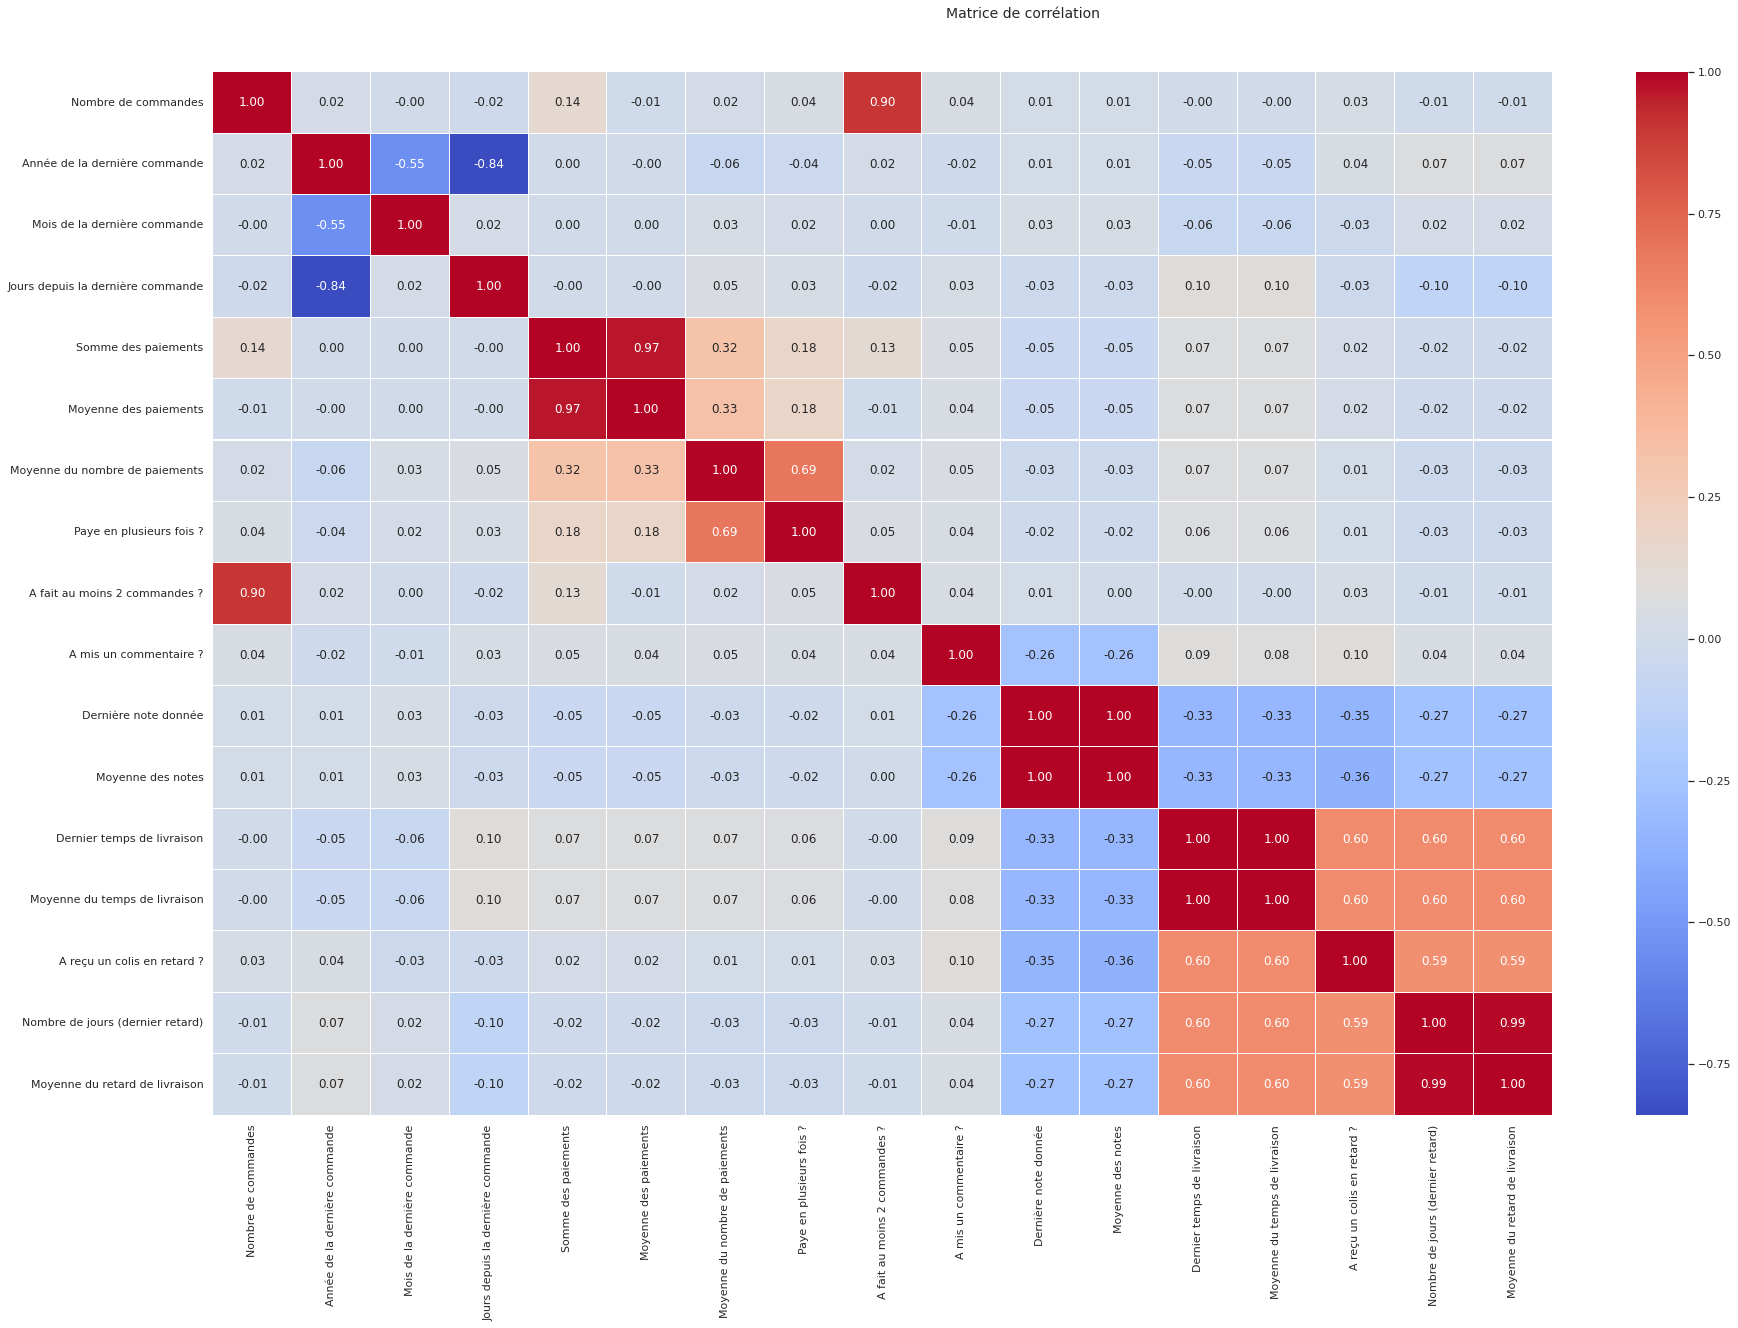

In [18]:
f, ax = plt.subplots(figsize=(30, 18))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Matrice de corrélation', fontsize=14)

# Analyse exploratoire

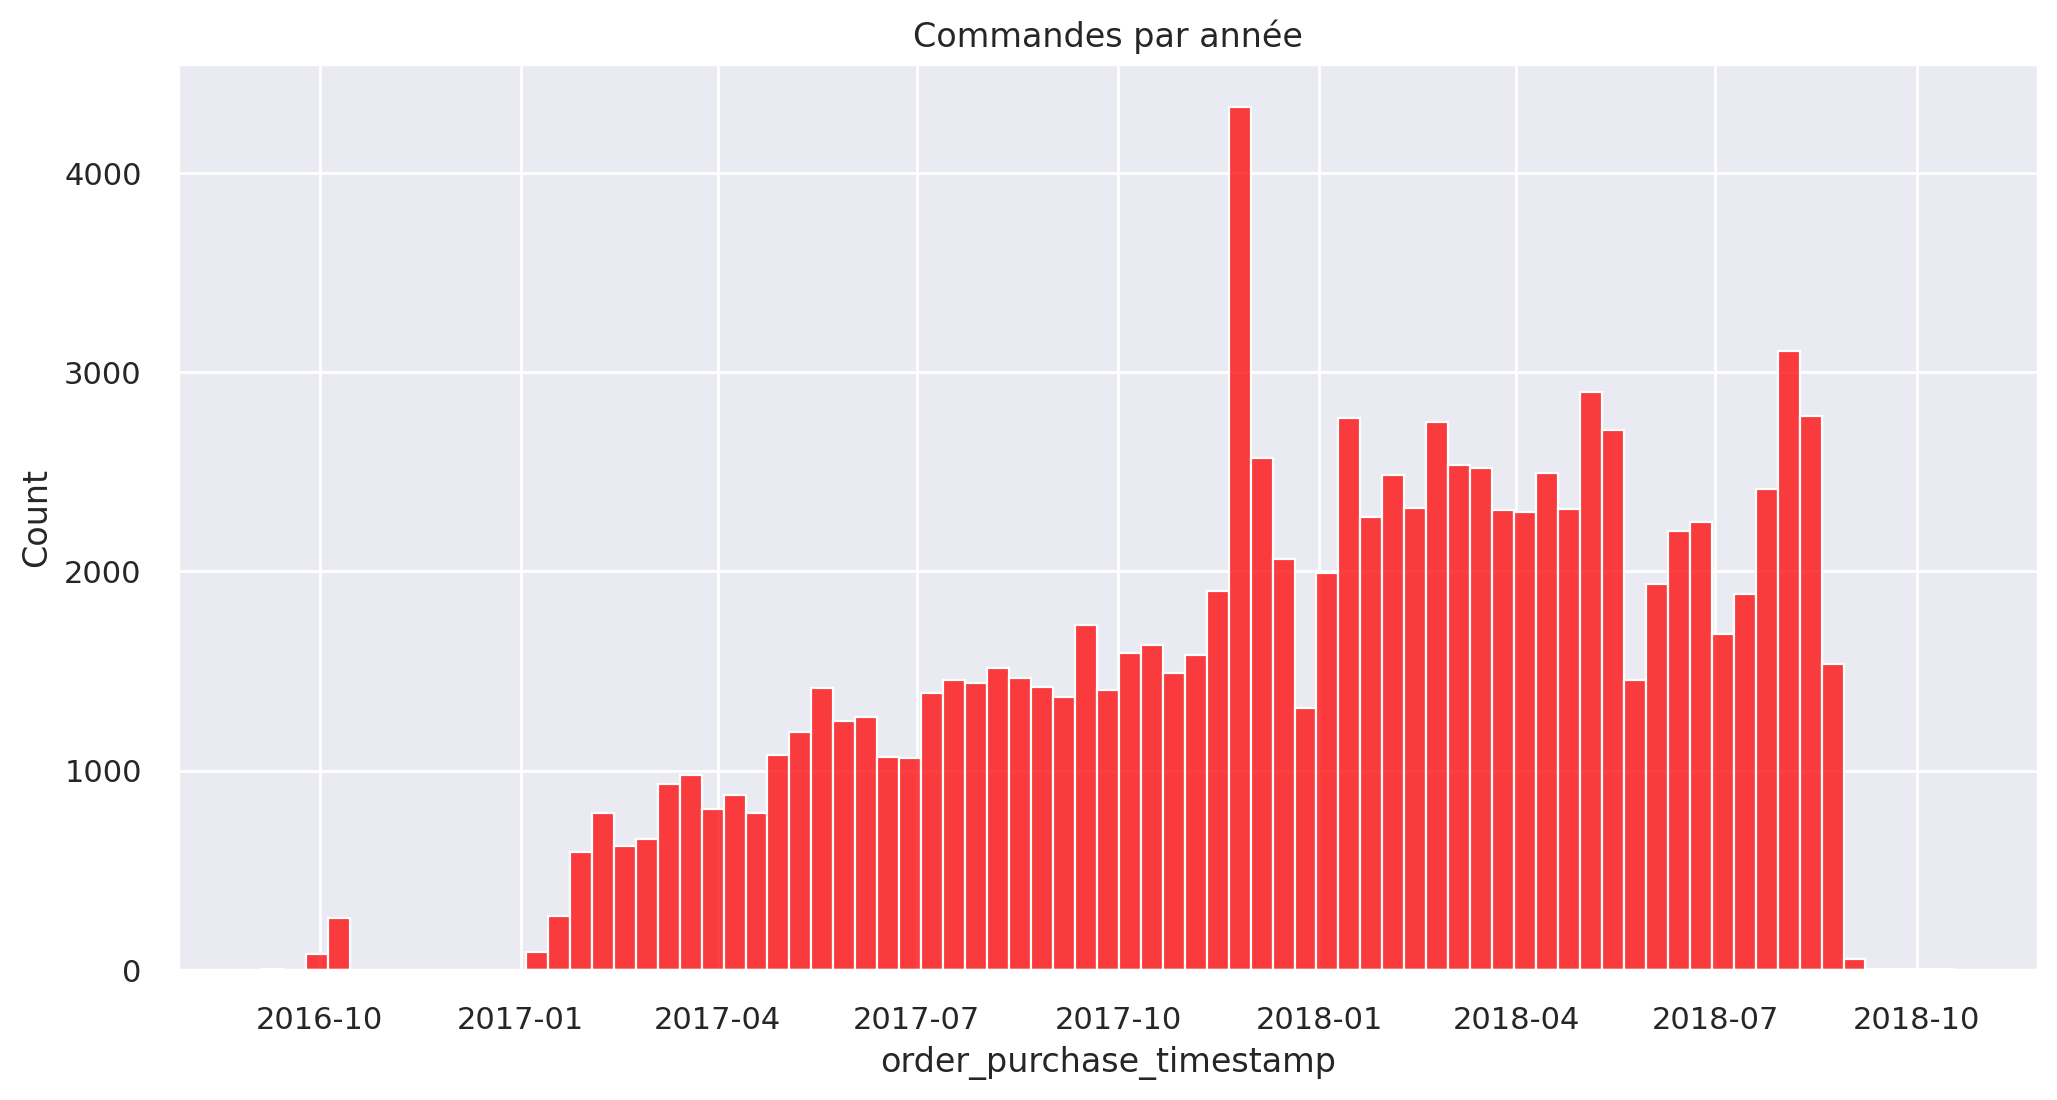

In [82]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=customers_orders,x="order_purchase_timestamp",color="red")
plt.title("Commandes par année")
plt.show()

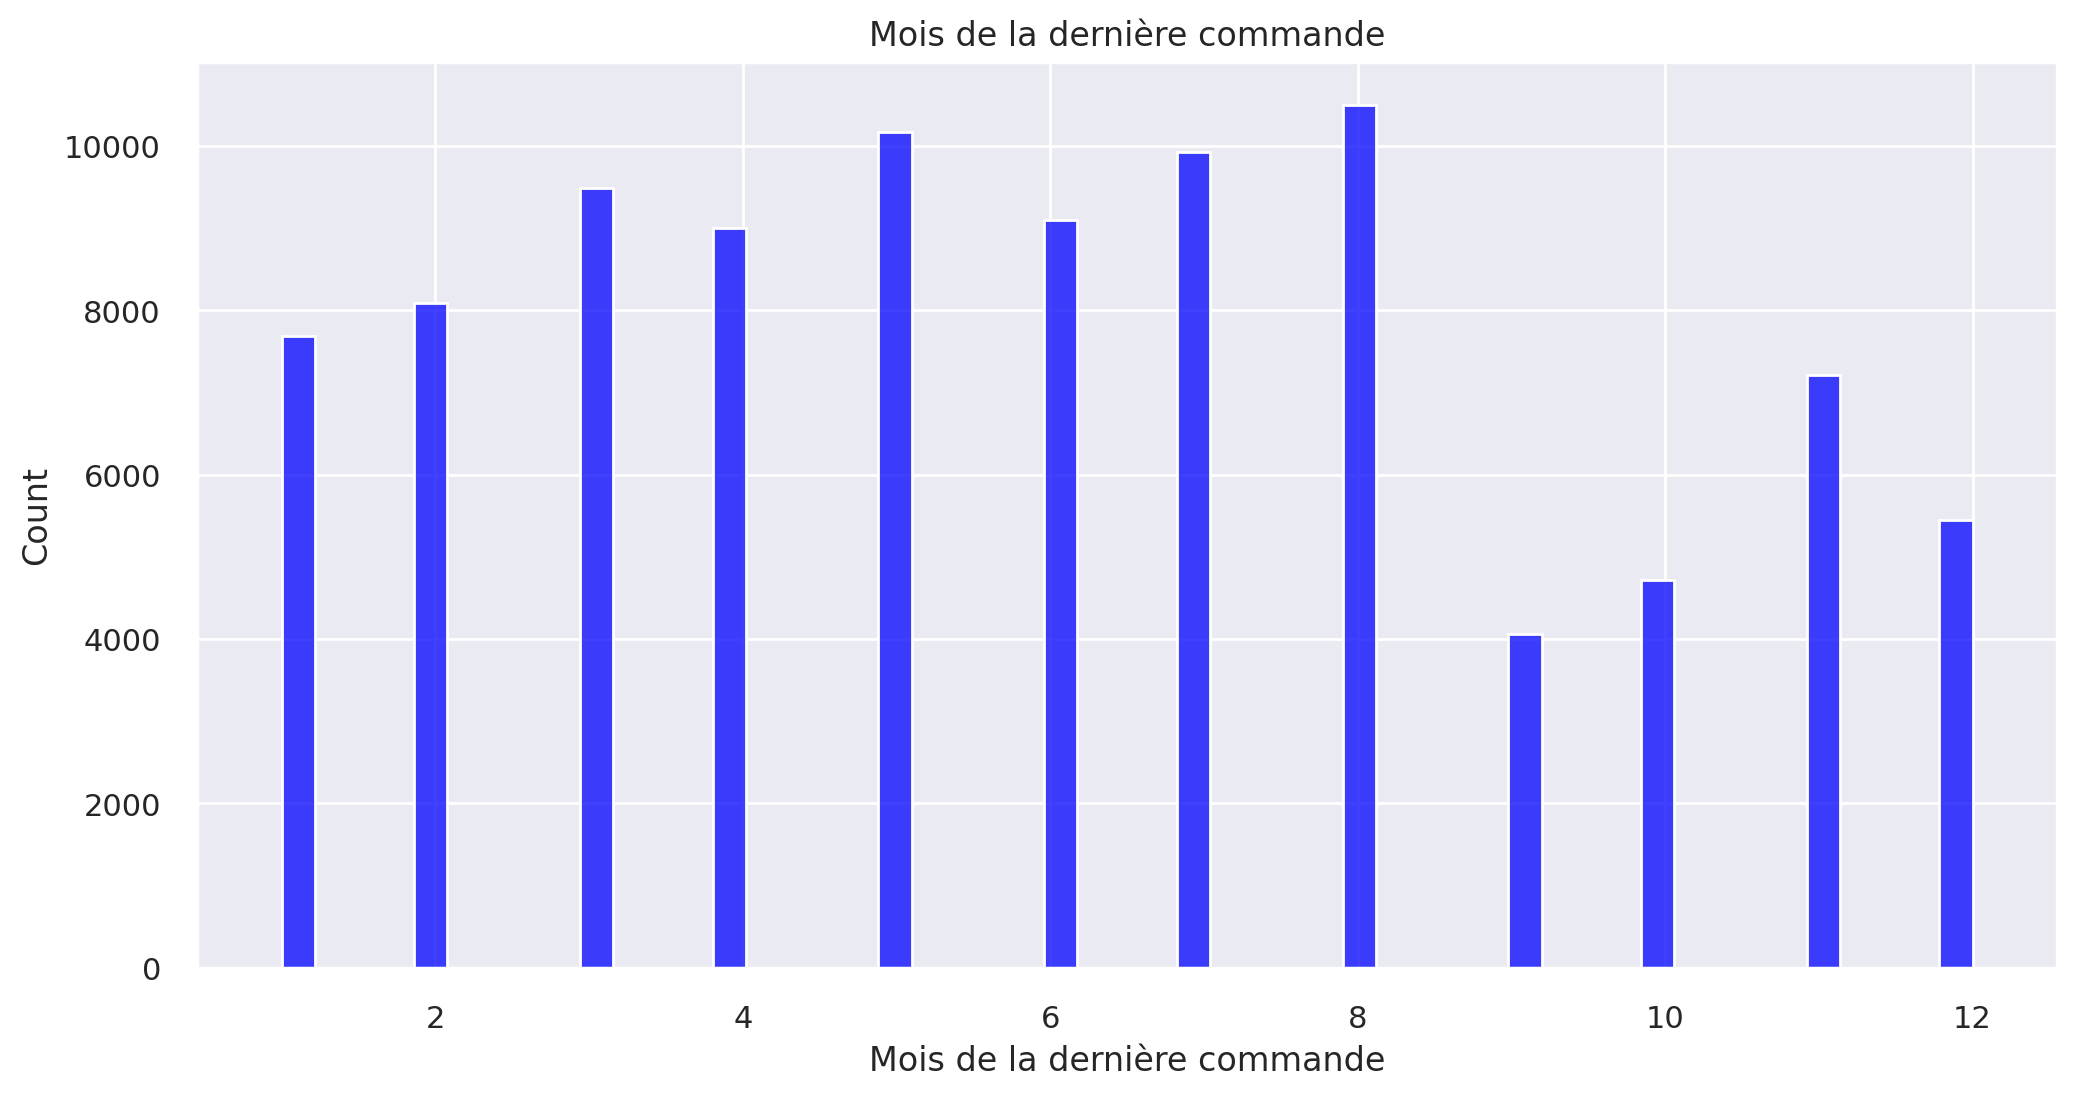

In [83]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=data,x="Mois de la dernière commande",color="blue")
plt.title("Mois de la dernière commande")
plt.show()

# Sélection des variables et normalisation

In [84]:
data.dtypes

ID Client                                    object
Nombre de commandes                           int64
Ville                                        object
Date de la dernière commande         datetime64[ns]
Année de la dernière commande                 int64
Mois de la dernière commande                  int64
Jours depuis la dernière commande             int64
Somme des paiements                         float64
Moyenne des paiements                       float64
Moyenne du nombre de paiements              float64
Paye en plusieurs fois ?                       bool
A fait au moins 2 commandes ?                  bool
A mis un commentaire ?                         bool
Dernière note donnée                          int64
Moyenne des notes                           float64
Dernier temps de livraison                  float64
Moyenne du temps de livraison               float64
A reçu un colis en retard ?                    bool
Nombre de jours (dernier retard)            float64
Moyenne du r

In [85]:
from mlxtend.preprocessing import minmax_scaling

In [19]:
X = data[[#"Nombre de commandes",
          "A fait au moins 2 commandes ?",
          "Moyenne des paiements",
          #"Somme des paiements",
          #"Moyenne du nombre de paiements",
          #"Paye en plusieurs fois ?",
          #"Moyenne des notes",
          "Dernière note donnée",
          #"A mis un commentaire ?",
          #"Dernier temps de livraison",
          "Moyenne du temps de livraison",
          "A reçu un colis en retard ?",
          #"Nombre de jours (dernier retard)",
          "Moyenne du retard de livraison",
          "Jours depuis la dernière commande",
          "Mois de la dernière commande"]]

X = X.dropna()

In [87]:
X_scaled = minmax_scaling(X, 
  columns=[#"Nombre de commandes",
          "A fait au moins 2 commandes ?",
          "Moyenne des paiements",
          #"Somme des paiements",
          #"Moyenne du nombre de paiements",
          #"Paye en plusieurs fois ?",
          #"Moyenne des notes",
          "Dernière note donnée",
          #"A mis un commentaire ?",
          #"Dernier temps de livraison",
          "Moyenne du temps de livraison",
          "A reçu un colis en retard ?",
          #"Nombre de jours (dernier retard)",
          "Moyenne du retard de livraison",
          "Jours depuis la dernière commande",
          "Mois de la dernière commande"])

In [20]:
X.head()

,A fait au moins 2 commandes ?,Moyenne des paiements,Dernière note donnée,Moyenne du temps de livraison,A reçu un colis en retard ?,Moyenne du retard de livraison,Jours depuis la dernière commande,Mois de la dernière commande
0,True,54.566471,5,3.333333,False,-9.333333,57,8
1,True,130.295556,3,13.555556,True,-9.222222,231,2
2,True,119.876250,5,13.500000,False,-11.500000,245,2
3,True,160.388571,5,16.000000,True,-15.714286,138,6
4,True,108.404286,5,3.571429,False,-14.000000,111,6


# K-Means Clustering (Raw)

In [88]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score
from sklearn.pipeline import Pipeline, make_pipeline

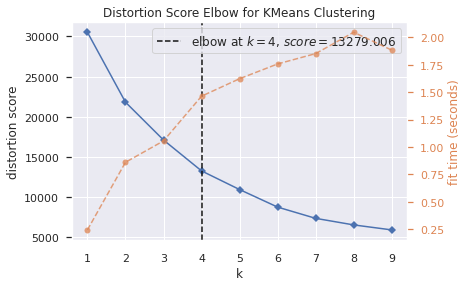

In [89]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs


visualizer = Pipeline([
    ("kelbowvisualizer", KElbowVisualizer(KMeans(random_state=0), k=(1,10)))
])

visualizer.fit(X_scaled)
visualizer.named_steps['kelbowvisualizer'].show()
elbow_score = visualizer.named_steps['kelbowvisualizer'].elbow_value_

In [90]:
model = Pipeline([
    ("kmeans", KMeans(elbow_score, random_state=0))
])
model.fit(X_scaled)

Pipeline(steps=[('kmeans', KMeans(n_clusters=4, random_state=0))])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



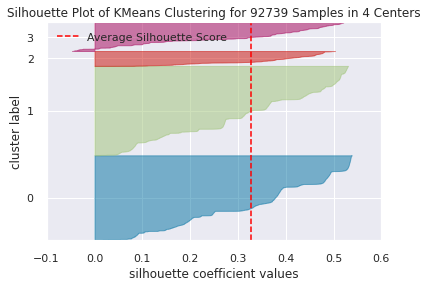

In [91]:
from yellowbrick.cluster import SilhouetteVisualizer

silhouette_visualizer = Pipeline([
    ("silhouettevisualizer", SilhouetteVisualizer(model.named_steps['kmeans'], colors='yellowbrick'))
])


silhouette_visualizer.fit(X_scaled)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



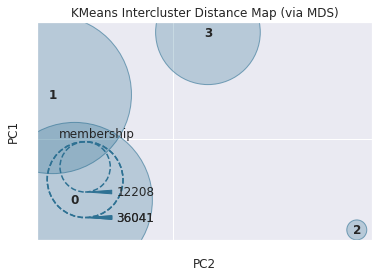

In [92]:
from yellowbrick.cluster import InterclusterDistance

intercluster = Pipeline([
    ("intercluster", InterclusterDistance(model.named_steps['kmeans']))
])

intercluster.fit(X_scaled)
intercluster.named_steps['intercluster'].show()

In [93]:
# Applique les labels au dataset
kmeans_labels = model.named_steps['kmeans'].labels_
X_clusters = X.copy()
X_clusters['cluster_label'] = kmeans_labels

In [94]:
# Regroupe par labels et donne la moyenne des variables
X_clusters = X_clusters.groupby('cluster_label').mean().reset_index()
X_clusters

,cluster_label,A fait au moins 2 commandes ?,Moyenne des paiements,Dernière note donnée,Moyenne du temps de livraison,A reçu un colis en retard ?,Moyenne du retard de livraison,Jours depuis la dernière commande,Mois de la dernière commande
0,0,0.029577,153.155173,4.674315,10.515253,0.0,-13.837211,313.237341,3.296440
1,1,0.030988,153.321470,4.697777,9.312110,0.0,-13.282656,263.702260,8.716967
2,2,0.048062,172.298512,2.298928,32.410319,1.0,10.045775,267.672234,5.670501
3,3,0.034158,174.902832,1.875164,11.215239,0.0,-13.156610,283.857061,5.930783


In [95]:
# Préparation des données à la visualisation
X_clusters_scaled = preprocessing.StandardScaler().fit_transform(X_clusters.drop('cluster_label', axis=1))
X_clusters_scaled

array([[-0.83482906, -1.00405245,  0.98443177, -0.55837906, -0.57735027,
        -0.61766439,  1.59681846, -1.35693142],
       [-0.64239782, -0.98778539,  1.00236684, -0.68399845, -0.57735027,
        -0.56311756, -0.9448986 ,  1.46417596],
       [ 1.68710852,  0.86854209, -0.83142643,  1.72767147,  1.73205081,
         1.73150147, -0.74119342, -0.12135401],
       [-0.20988164,  1.12329575, -1.15537218, -0.48529397, -0.57735027,
        -0.55071952,  0.08927356,  0.01410946]])

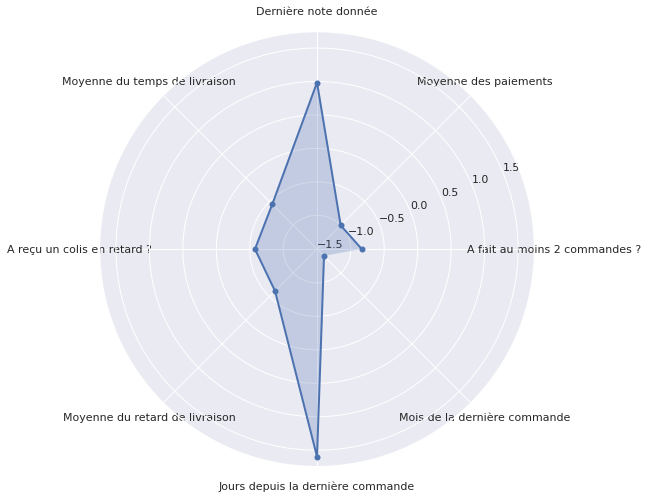

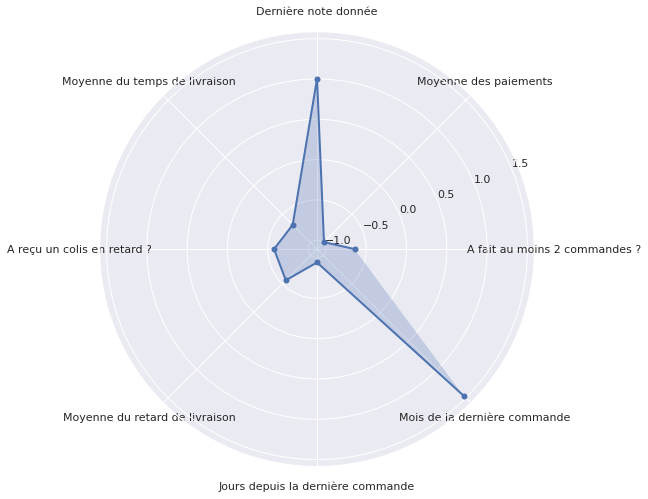

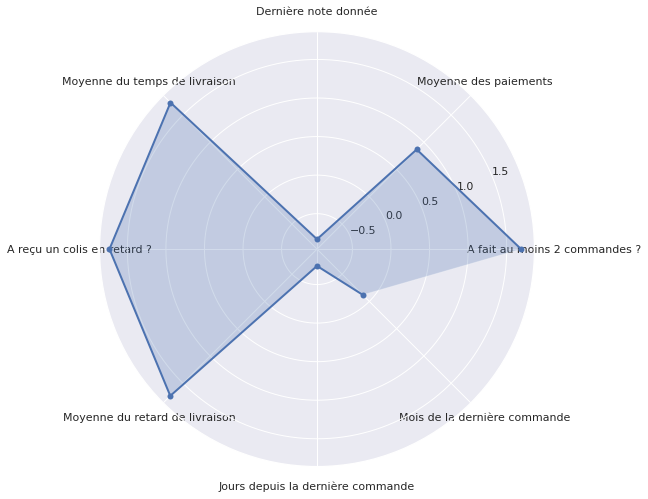

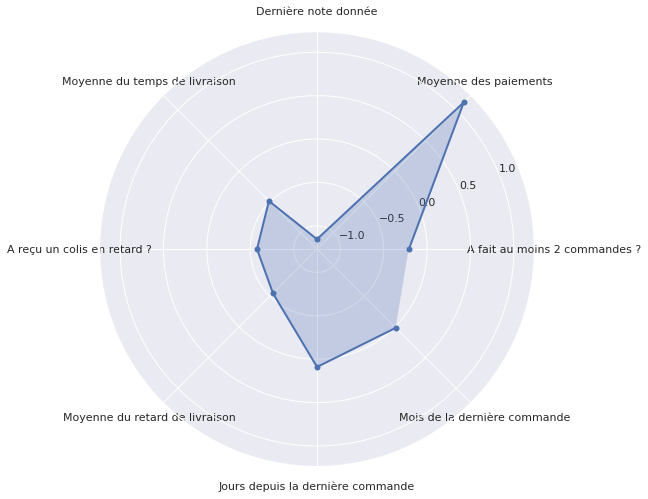

In [96]:
labels=X_clusters.drop('cluster_label', axis=1).columns.values
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

for row in X_clusters_scaled:
    fig = plt.figure(figsize=(8,8))
    ax=fig.add_subplot(111, polar=True)
    ax.plot(angles, row, 'o-', linewidth=2)
    ax.fill(angles, row, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.grid(True)

# Analyse en composantes principales

computing PCA dimension reduction on range(0, 8) features
cumulated variance explined by PCA: [0.37060021 0.63046832 0.77389461 0.90005132 0.99394052 0.9979453
 0.99926016 1.        ]


([<matplotlib.axis.XTick at 0x7f8317ab2890>,
 <a list of 8 Text major ticklabel objects>)

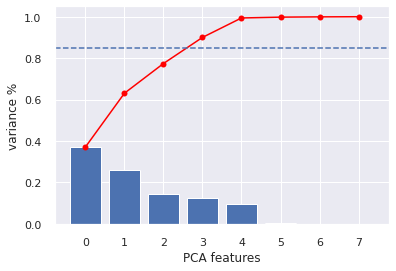

In [97]:
from sklearn import decomposition

pipeline = Pipeline([
    ("pca", decomposition.PCA(svd_solver='full'))
])

pipeline.fit(X_scaled)
X_projected = pd.DataFrame(pipeline.transform(X_scaled))
pca = pipeline.named_steps['pca']


features = range(pca.n_components_)
print(f'computing PCA dimension reduction on {features} features')
cumulated = np.cumsum(pca.explained_variance_ratio_)
print(f'cumulated variance explined by PCA: {cumulated}')
plt.bar(features, pca.explained_variance_ratio_)
plt.plot(features, cumulated, marker='o', c='red')
plt.axhline(y=0.85, linestyle='--')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [98]:
# 4 composantes expliquent au moins 85% de la variance
n_pca = 4

In [99]:
import plotly.express as px

fig = px.scatter_matrix(
    X_projected,
    labels=X_projected.columns,
    dimensions=range(n_pca),
)
fig.update_traces(diagonal_visible=False)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [100]:
X_projected.columns = X_projected.columns.astype(str)

fig = px.scatter_3d(
    X_projected, x='0', y='1', z='2', color='3',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    # width=15, height=15
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# K-means Clustering (Refined)

In [101]:
X_projected = X_projected.iloc[:,:n_pca]

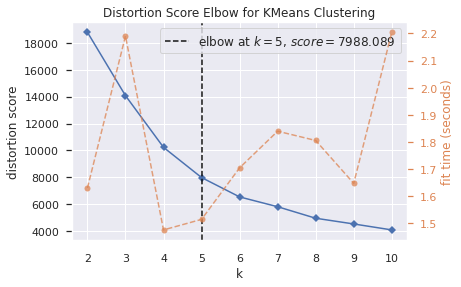

In [102]:
visualizer_pca = Pipeline([
    ("kelbowvisualizer", KElbowVisualizer(KMeans(random_state=0),K=(1,12)))])

visualizer_pca.fit(X_projected)
visualizer_pca.named_steps['kelbowvisualizer'].show()
elbow_score = visualizer_pca.named_steps['kelbowvisualizer'].elbow_value_

model = KMeans(elbow_score)

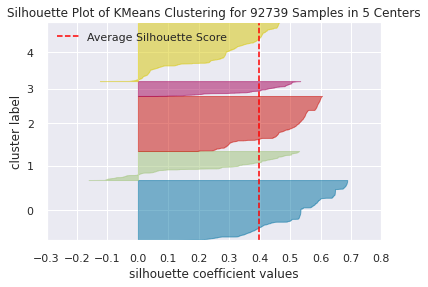

In [103]:
silhouette_visualizer_pca = Pipeline([
    ("silhouettevisualizer", SilhouetteVisualizer(model, colors='yellowbrick'))
])

silhouette_visualizer_pca.fit(X_projected)
silhouette_visualizer_pca.named_steps['silhouettevisualizer'].show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



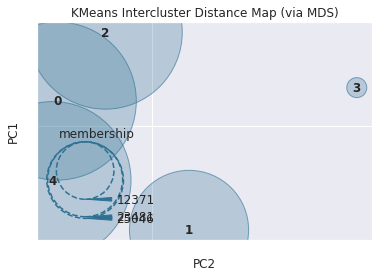

In [104]:
intercluster_pca = Pipeline([
    ("intercluster", InterclusterDistance(model))
])

intercluster_pca.fit(X_projected)
intercluster_pca.named_steps['intercluster'].show()

In [105]:
# Applique les labels au dataset
kmeans_labels = model.labels_

X_clusters = X.copy()
X_clusters['cluster_label'] = kmeans_labels

In [106]:
# Regroupe par labels et donne la moyenne des variables
X_clusters = X_clusters.groupby('cluster_label').mean().reset_index()
X_clusters

,cluster_label,A fait au moins 2 commandes ?,Moyenne des paiements,Dernière note donnée,Moyenne du temps de livraison,A reçu un colis en retard ?,Moyenne du retard de livraison,Jours depuis la dernière commande,Mois de la dernière commande
0,0,0.036988,158.329444,4.766307,7.976250,0.0,-13.621732,124.831967,5.969131
1,1,0.031040,173.966234,1.889985,11.362094,0.0,-13.055727,279.244523,5.694204
2,2,0.029471,151.492276,4.626379,10.691969,0.0,-13.131150,374.483455,9.810315
3,3,0.048062,172.298512,2.298928,32.410319,1.0,10.045775,267.672234,5.670501
4,4,0.025793,150.021477,4.672243,11.024671,0.0,-13.928191,374.630759,2.823924


In [107]:
# Préparation des données pour la visualisation
X_clustered_scaled = preprocessing.StandardScaler().fit_transform(X_clusters.drop('cluster_label', axis=1))
X_clustered_scaled

array([[ 0.34907002, -0.28536216,  0.87282166, -0.75135879, -0.5       ,
        -0.51966431, -1.73803742, -0.01099162],
       [-0.41500145,  1.25748893, -1.37767538, -0.37261   , -0.5       ,
        -0.45943481, -0.05375378, -0.13441563],
       [-0.61666635, -0.95997199,  0.76333869, -0.44757184, -0.5       ,
        -0.46746067,  0.98508255,  1.71344523],
       [ 1.77180172,  1.09293806, -1.05770888,  1.98189557,  2.        ,
         1.99883498, -0.17998067, -0.14505675],
       [-1.08920394, -1.10509284,  0.79922391, -0.41035493, -0.5       ,
        -0.55227519,  0.98668931, -1.42298124]])

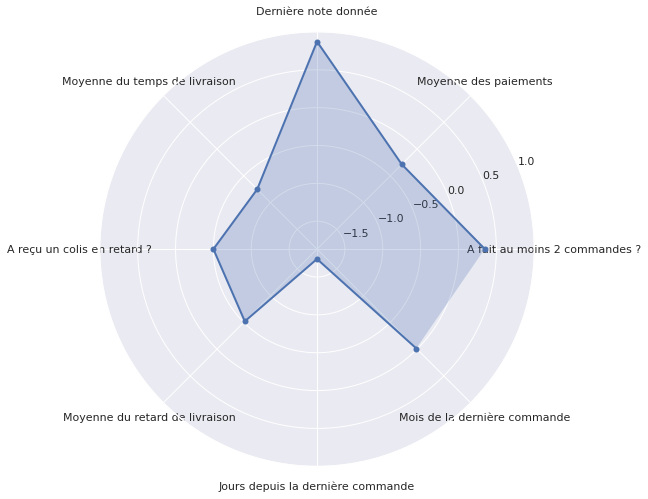

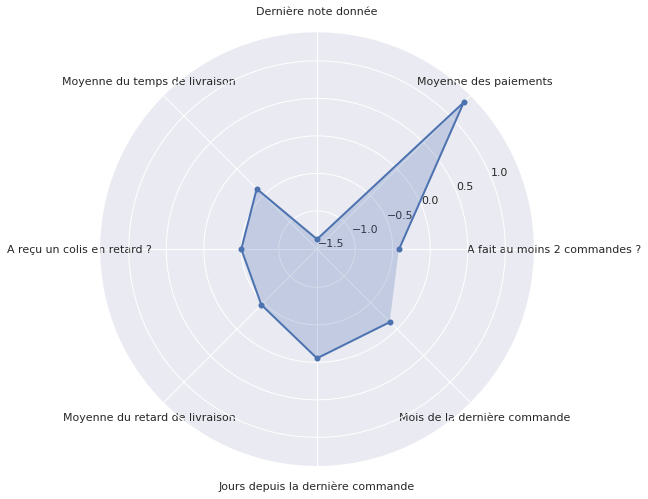

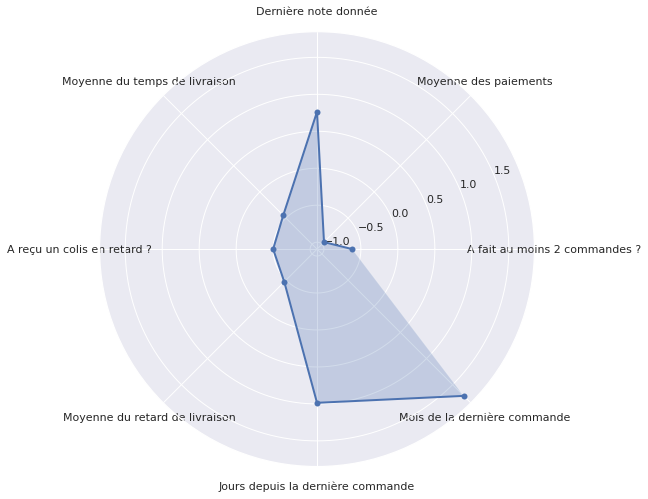

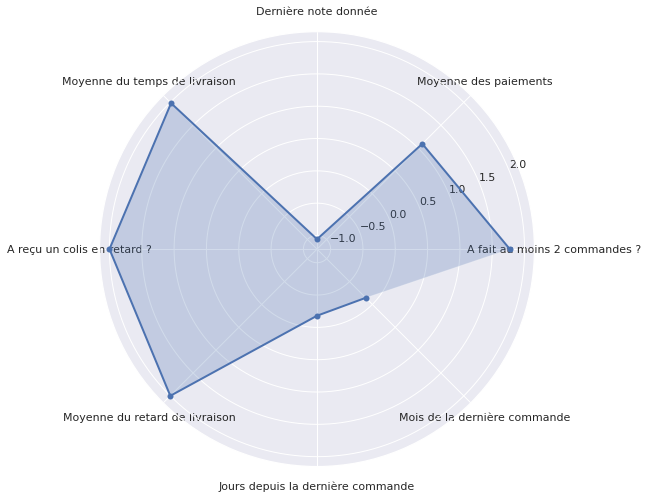

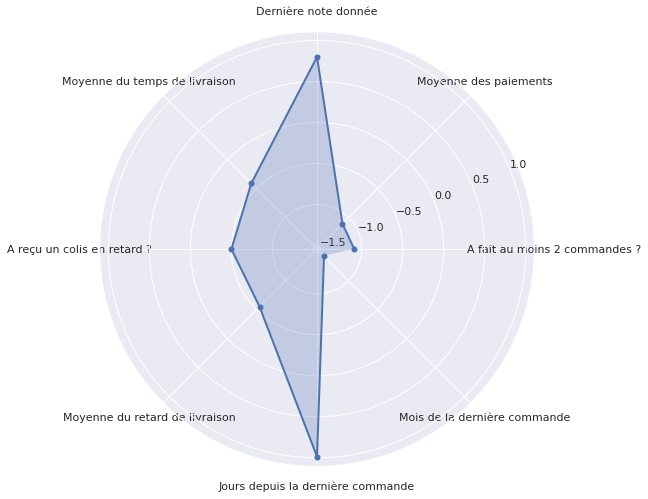

In [108]:
labels=X_clusters.drop('cluster_label', axis=1).columns.values
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

for row in X_clustered_scaled:
    fig = plt.figure(figsize=(8,8))
    ax=fig.add_subplot(111, polar=True)
    ax.plot(angles, row, 'o-', linewidth=2)
    ax.fill(angles, row, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.grid(True)

Analyse des clusters

In [109]:
data_stability = data.copy()

# Stabilité des clusters

In [110]:
data = data_stability.copy()
data = data.dropna()

In [111]:
def select_btw_dates(date_start, date_stop, olist) :
    mask = (data['Date de la dernière commande'] >= date_start) & (data['Date de la dernière commande'] < date_stop)
    return data.loc[mask]

getting data between 2017-12-01 and 2018-01-01
getting data between 2018-01-01 and 2018-02-01
getting data between 2018-02-01 and 2018-03-01
getting data between 2018-03-01 and 2018-04-01
getting data between 2018-04-01 and 2018-05-01
getting data between 2018-05-01 and 2018-06-01
getting data between 2018-06-01 and 2018-07-01
getting data between 2018-07-01 and 2018-08-01
[1, 0.6008454221907679, 0.4798768830436992, 0.4191732992117716, 0.6514449774661958, 0.6414397305752048, 0.5481193733221439, 0.5200459752517708, 0.8219605356480657]


Text(0.5, 1.0, 'model prediction stability, with cumulative datas = False')

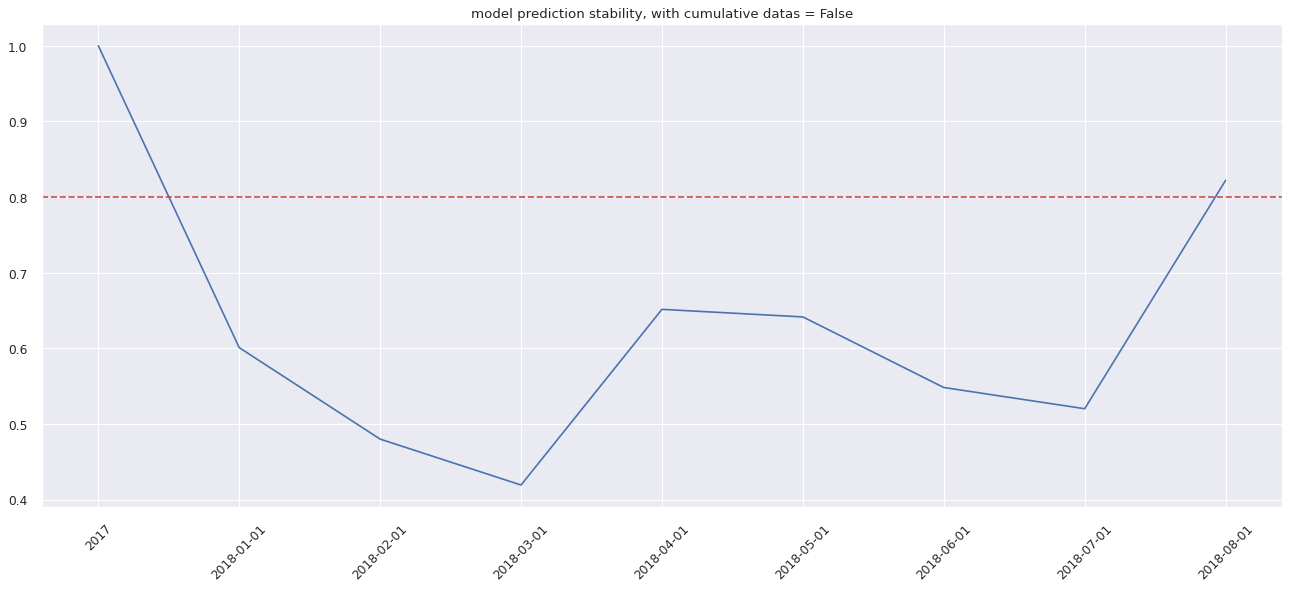

In [112]:
from sklearn.metrics.cluster import adjusted_rand_score as ari 

# Entraîne le modèle initial sur l'année entière 2017, pour avoir le plus de clients et le clustering le plus précis
data_2017 = select_btw_dates('2017-01-01', '2018-01-01', data)
model_2017 = Pipeline([
        ("kmeans", KMeans(elbow_score, random_state=0))]
    )
model_2017.fit(data_2017.select_dtypes('number'))


# Le modèle 2018 sera entraîné sur chaque mois
data_2018 = data_2017.copy()
model_2018 = Pipeline([
        ("kmeans", KMeans(elbow_score, random_state=1))]
    )

ari_array = [1] # Le premier élement représente 100%, notre point de départ
ari_array_legend = ['2017']

cumulative_flag = False

for m in range(1, 9):
    if (cumulative_flag) : 
        month_label_0 = '2017-01-01'
    else :
        if (m == 1):
            month_label_0 = '2017-12-01'
        else: 
            month_label_0 = '2018-0' + str(m-1) + '-01'

    # Choisis le dataset pour chaque mois
    month_label = '2018-0' + str(m) + '-01'
    print(f'getting data between {month_label_0} and {month_label}')

    data_2018 = select_btw_dates(month_label_0, month_label, data)

    ari_array.append(
        ari(
            model_2018.fit(data_2018.select_dtypes('number')).named_steps['kmeans'].labels_, # Ce que donne le nouveau modèle : attendu
            model_2017.predict(data_2018.select_dtypes('number')), # Ce que prédisait le nouveau modèle : obtenu
    ))
    ari_array_legend.append(month_label)
    


print(ari_array)

plt.figure(figsize=(20, 8), dpi=80)
plt.plot(ari_array_legend, ari_array)
plt.axhline(y=0.80, color='r', linestyle='--')
plt.xticks(rotation=45)
plt.title(f'model prediction stability, with cumulative datas = {cumulative_flag}')

# DBSCAN

In [113]:
data_db = data.copy()


data_db = data_db.dropna()

In [114]:
Xdb = data_db[["Nombre de commandes",
          "Moyenne des paiements",
          "Moyenne du nombre de paiements",
          "Dernière note donnée",
          "Moyenne du temps de livraison",
          "Moyenne du retard de livraison",
          "Jours depuis la dernière commande"]]

In [115]:
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
rcParams["figure.figsize"] = 14, 6

In [116]:
Xdb = Xdb.values.astype("float32")

In [117]:
Xdb_scaler = StandardScaler().fit(Xdb)
Xdb = Xdb_scaler.transform(Xdb)
Xdb

array([[ 7.34465714e+01, -4.76949632e-01, -5.77777922e-01, ...,
        -8.77344191e-01,  2.53429681e-01, -1.50006819e+00],
       [ 3.66410332e+01, -1.25699937e-01,  1.57675540e+00, ...,
         2.06129804e-01,  2.64464051e-01, -3.59669834e-01],
       [ 2.74396496e+01, -1.74027205e-01, -7.09837854e-01, ...,
         2.00241387e-01,  3.82587872e-02, -2.67913640e-01],
       ...,
       [-1.64503559e-01, -5.08612454e-01, -7.09837854e-01, ...,
        -1.70730680e-01,  6.83771431e-01,  3.41609627e-01],
       [-1.64503559e-01, -6.87681213e-02, -3.35668057e-01, ...,
         5.71213424e-01, -4.08634543e-01,  2.01288295e+00],
       [-1.64503559e-01, -6.29067481e-01, -7.09837854e-01, ...,
        -5.94698787e-01, -1.10705666e-01,  1.05665140e-01]], dtype=float32)

In [118]:
model = DBSCAN(eps = 0.3, min_samples = 200, metric = "euclidean").\
  fit(Xdb)
model

DBSCAN(eps=0.3, min_samples=200)

In [119]:
outliers_df = data_db[model.labels_ == -1]
clusters_df = data_db[model.labels_ != -1]

colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = "black"

clusters = Counter(model.labels_)
print(clusters)
print(data_db[model.labels_ == -1].head())
print("Number of clusters = {}".format(len(clusters)-1))

Counter({-1: 81705, 0: 10659, 2: 208, 1: 167})
                          ID Client  Nombre de commandes         Ville Date de la dernière commande  Année de la dernière commande  Mois de la dernière commande  Jours depuis la dernière commande  Somme des paiements  Moyenne des paiements  Moyenne du nombre de paiements  Paye en plusieurs fois ?  A fait au moins 2 commandes ?  A mis un commentaire ?  Dernière note donnée  Moyenne des notes  Dernier temps de livraison  Moyenne du temps de livraison  A reçu un colis en retard ?  Nombre de jours (dernier retard)  Moyenne du retard de livraison
0  8d50f5eadf50201ccdcedfb9e2ac8455                   17     sao paulo          2018-08-20 19:14:26                           2018                             8                                 57               927.63              54.566471                        1.352941                      True                           True                   False                     5           4.764706            

In [120]:
model.labels_

array([-1, -1, -1, ..., -1, -1,  0])